## Lennard-Jones Potential

$V = 4\epsilon [(\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^6]$

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def V(r,sigma,epsilon):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

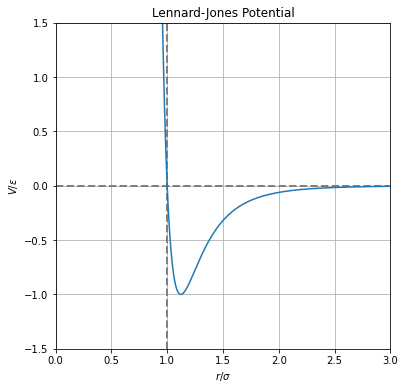

In [24]:
r = np.linspace(0.01,3.0,num=500)


plt.figure(figsize=[6,6])
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.axvline(1, color='grey',linestyle='--',linewidth=2)
plt.plot(r,V(r,1,1))
plt.xlim([0.0,3.0])
plt.ylim([-1.5,1.5])
plt.title("Lennard-Jones Potential")
plt.xlabel("$r/\sigma$")
plt.ylabel("$V/\epsilon$")
plt.grid()
plt.savefig("LJpoten.pdf")

The Lennard-Jones potential has a zero around $r=\sigma$. Let's verify this using a root finding algorithm

In [25]:
#redifing the potential in this unit:

def V(r):
    return 4*((1.0/r)**12 - (1.0/r)**6)

In [26]:
def bisection(f,a,b,N):

    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    a_n = a
    b_n = b
    
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
            
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
            
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
    
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2


In [27]:
bisection(V,0.1,1.1,100)

Found exact solution.


1.0

### Therefore, At $r=\sigma$, the potential V=0

The force in this case is:

$F = 48 \epsilon (\frac{\sigma^{12}}{r^{13}})-24\epsilon (\frac{\sigma^6}{r^7})$

The force, F=0 at $r = \sigma*(2)^{1/6}$

For $\sigma = 1$, $r= 2^{1/6}$. Let's verify this.

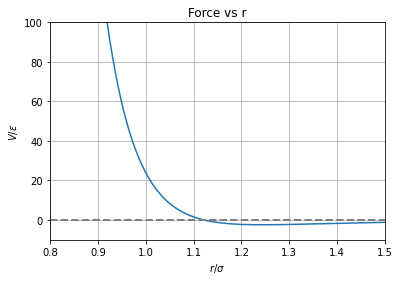

In [32]:
def lj_force(r, epsilon, sigma):
 
    return 48 * epsilon * np.power(
        sigma, 12) / np.power(
        r, 13) - 24 * epsilon * np.power(
        sigma, 6) / np.power(r, 7)
    
r = np.linspace(0.01, 2, 1000)
plt.plot(r, lj_force(r,1,1))
plt.xlabel("$r/\sigma$")
plt.ylabel("$V/\epsilon$")
plt.xlim([0.8,1.5])
plt.ylim(-10,100)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.title("Force vs r")
plt.grid()
plt.savefig("Fvr.pdf")

In [33]:
def ljf(r):
 
    return 48 * 1.0/ np.power(
        r, 13) - 24 * 1.0/ np.power(r, 7)

In [34]:
bisection(ljf,1.0,1.2,1000)

1.122462048309373

In [35]:
np.power(2,1/6)

1.122462048309373

### The force vanishes at $r = \sigma \ 2^{1/6}$

Hence confirmed!

In [12]:
V(2**(1/6))

-1.0

### The value of potential at $r_{min} = \sigma 2^{1/6}$ is -$\epsilon$

This is the minimum energy required to break the bond and tear the atom apart!